In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('insurance2.csv')

In [3]:
df.shape

(1338, 8)

1. Identify shape of the data.
2. identify and observe first, last, and random rows for data understanding.
3. identify missing values.
4. Display total insurance claims accepted and rejected. Find percentages.
5. What is mean, median of insurane cost. Identify insurance cost distribution.(Quantile, Plot)
6. What is age distribution.
7. Identify categorical data.
8. Display insurance charges vis a vi smokers. (plot, median)
9. Find relation of i. Sex and Charge   ii. BMI and charge       iii. age and charge

In [4]:
df.shape

(1338, 8)

In [5]:
df.iloc[1]
#df.head(1)
#df.tail(1)
#df.sample(5)

age                 18.0000
sex                  1.0000
bmi                 33.7700
children             1.0000
smoker               0.0000
region               2.0000
charges           1725.5523
insuranceclaim       1.0000
Name: 1, dtype: float64

In [6]:
df.iloc[-1]

age                  61.0000
sex                   0.0000
bmi                  29.0700
children              0.0000
smoker                1.0000
region                1.0000
charges           29141.3603
insuranceclaim        1.0000
Name: 1337, dtype: float64

In [7]:
df.iloc[np.random.randint(1,10)]

age                 46.0000
sex                  0.0000
bmi                 33.4400
children             1.0000
smoker               0.0000
region               2.0000
charges           8240.5896
insuranceclaim       1.0000
Name: 6, dtype: float64

In [8]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [9]:
(df.insuranceclaim.value_counts())*100/len(df)

1    58.520179
0    41.479821
Name: insuranceclaim, dtype: float64

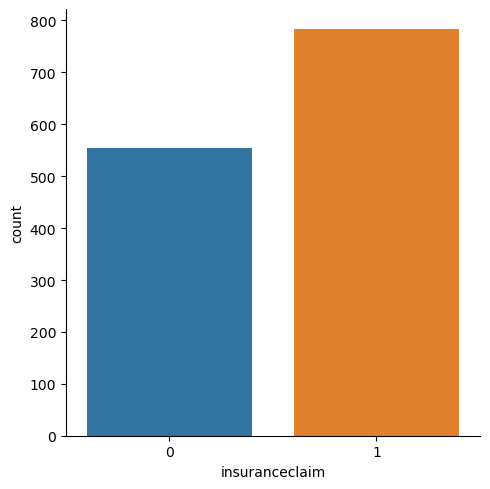

In [10]:
sns.catplot(data=df,x='insuranceclaim',kind='count')

In [11]:
df.charges.mean()

13270.422265141257

In [12]:
df.charges.median()

9382.033

In [13]:
df.charges.quantile([0.25,0.50,0.75])

0.25     4740.287150
0.50     9382.033000
0.75    16639.912515
Name: charges, dtype: float64

In [14]:
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [15]:
sns.boxplot(df.charges)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

In [16]:
df.nunique()


age                 47
sex                  2
bmi                548
children             6
smoker               2
region               4
charges           1337
insuranceclaim       2
dtype: int64

In [17]:
#sex,smoker,region,insuranceclaim

In [18]:
sns.catplot(x='sex',data=df,kind='count')

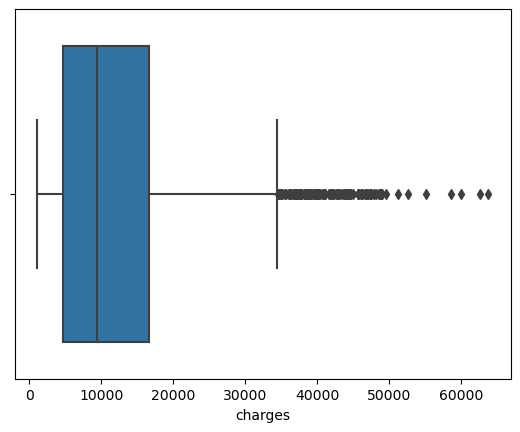

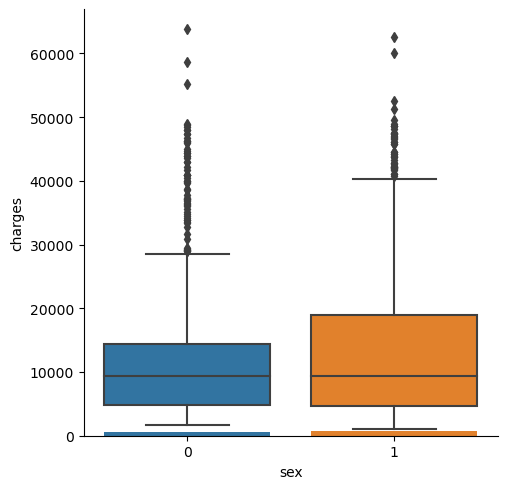

In [19]:
#sns.catplot(data=df,x='sex',y='charges')#categorical data sex vs charges boxplot,violinplot,stripplot
sns.boxplot(data=df,x='sex',y='charges')
plt.show()

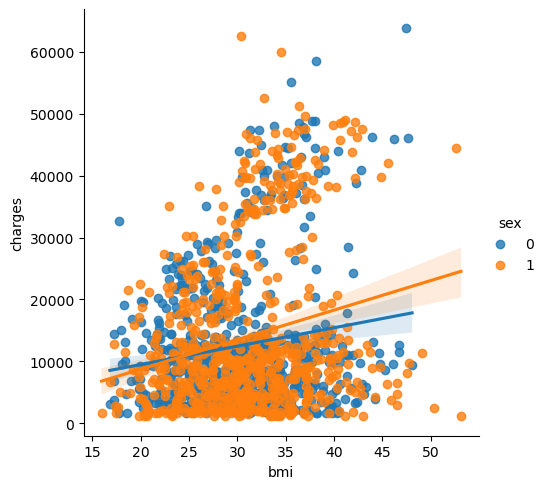

In [39]:
#sns.scatterplot(data=df,x='bmi',y='charges')# bmi vs charges 
sns.lmplot(data=df,x='bmi',y='charges',hue='sex')
plt.show()

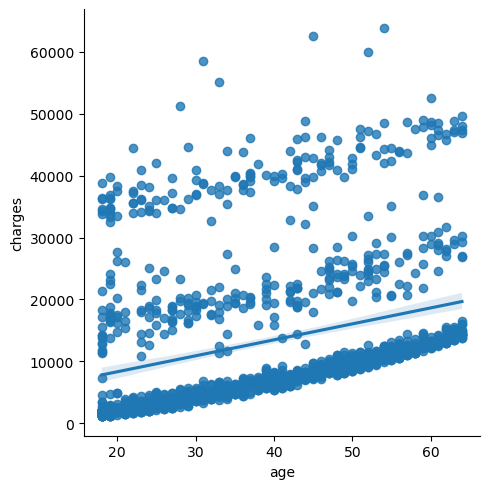

In [43]:
sns.lmplot(data=df,x='age',y='charges')#age vs insurance charges linear regression plot
#sns.regplot(data=df,x='age',y='charges')
#sns.scatterplot(data=df,x='age',y='charges',hue='sex')
plt.show()

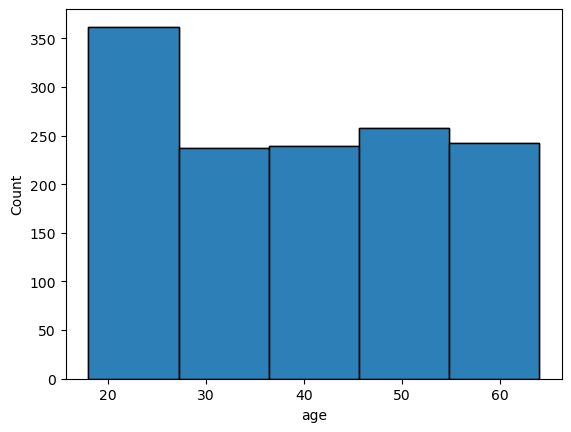

In [45]:
sns.histplot(data=df,x='age',bins=5) #distribution of age is non normal
plt.show()

In [23]:
df['age'].describe()#64-18=46/5 =9.2 5 bins

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

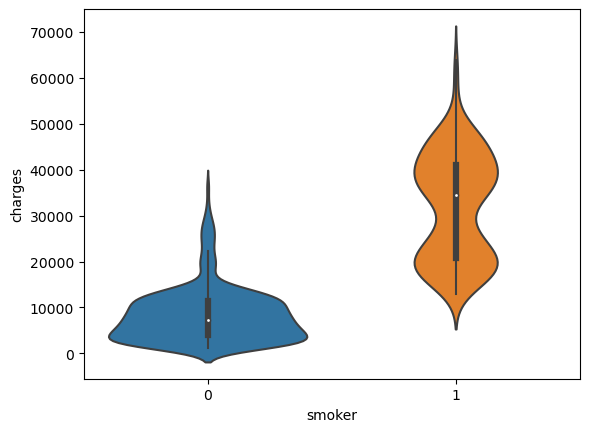

In [46]:
sns.violinplot(data=df,x='smoker',y='charges')
plt.show()

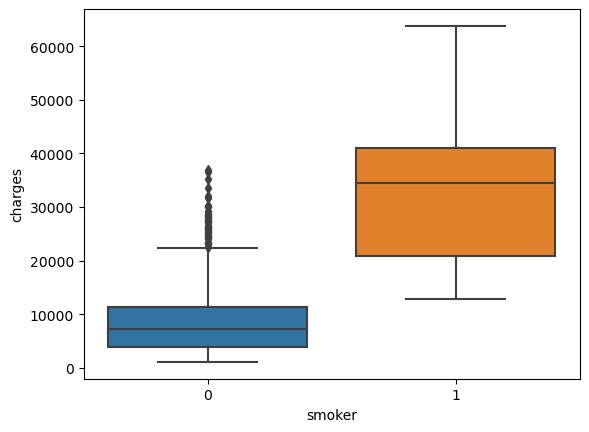

In [47]:
sns.boxplot(data=df,x='smoker',y='charges') #insurance charges via smoker
plt.show()

In [26]:
df.groupby('smoker')['charges'].describe()   

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
0,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
1,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


In [27]:
df[['bmi','age']].describe().round(2)

,bmi,age
count,1338.00,1338.00
mean,30.66,39.21
std,6.10,14.05
min,15.96,18.00
25%,26.30,27.00
50%,30.40,39.00
75%,34.69,51.00
max,53.13,64.00


In [28]:
# give statistical info for : 

# 1. Display Sex wise average value of charges for smokers.                 
# 2. Display average charges for smokers with high BMI.    (> Q2, > Q3)
# 3. Display average charges smokers with old age.         (> Q2, > Q3)
# 4. Display region wise charges for each sex.
# 5. Display region wise insurance claims.

In [53]:
df.query('smoker==1').groupby('sex')['charges'].mean() 
    #df.query('smoker==1').groupby('sex')['charges'].dexcribe() 

sex
0    30678.996276
1    33042.005975
Name: charges, dtype: float64

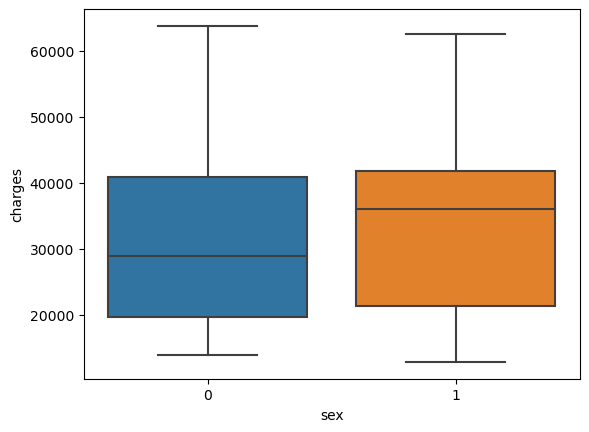

In [54]:
sns.boxplot(data=df.query('smoker==1'),x='sex',y='charges')
plt.show()

In [55]:
# 2. Display average charges for smokers with high BMI. 
# df.query('smoker==1' and 'bmi>30')[['charges']].mean()
df.query('smoker==1 and bmi>34.66')['charges'].mean()

43169.12253896101

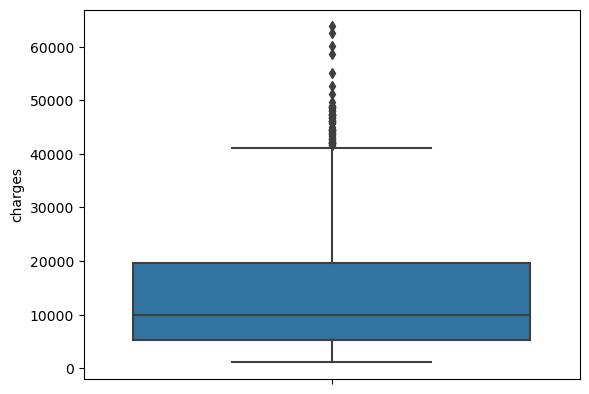

In [56]:
sns.boxplot(data=df.query('smoker==1' and 'bmi>30'),y='charges')
#sns.boxplot(data=df.query('smoker==1' and 'bmi>34.66'),y='charges',x='sex')
plt.show()

In [33]:
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [34]:
#3. Display average charges smokers with old age.
df.query('smoker==1' and 'age>39')[['charges']].mean()

charges    16430.512562
dtype: float64

In [35]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [65]:
# 4. Display region wise charges for each sex.

df.groupby(['region','sex'])['charges'].mean().unstack().round(1)

sex,0,1
region,,
0,12953.2,13854.0
1,12479.9,12354.1
2,13499.7,15879.6
3,11274.4,13412.9


In [71]:
# 5. Display region wise insurance claims.

df.groupby(['region'])['insuranceclaim'].value_counts().unstack()


insuranceclaim,0,1
region,,
0,132,192
1,162,163
2,119,245
3,142,183
